# Convolutional Neural Network

Compared to other machine learning methods, deep learning has far more possibility to be overfitting. Usually to minimize the side effects of overfitting, we apply methods such as early stopping or add randomness (flip, rotate, color/grayscale).

In the following section, we are going to train a convolutional neural network based on LeNet. The dataset has already been normalized (if not one of the simplest way is to divide the dataset by 255).

Relying on the high functionality and efficiency of GPU, we will train our LeNet model on the whole dataset hoping to get a better performance.

### 0. Basic Useful Setups:

In [1]:
### Basic setups
import sys
sys.path.append('./models/')
# Enable automatic reload of libraries
%load_ext autoreload
# All modules are reloaded before every comment
%autoreload 2b
import keras

c:\users\heath\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### 1. Read MNIST using Keras

In [2]:
from utils import load_mnist
(x_train, y_train), (x_test, y_test) = load_mnist()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### 1. Load LetNet Model

In [3]:
from keras.utils.vis_utils import plot_model # can be used to plot the model into a png file.
# from LeNet import LeNet
from myLeNet import LeNet
NUM_CLASSES = 10
model = LeNet(num_classes = NUM_CLASSES)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
# You can save the model by specifying a path
# modelPath = ____
# model.save(modelPath)

# You can also print out the model by typing
model.summary()

# You can plot the model into a png file and use it in your report.
pngModelPath = "model.png"
plot_model(model, to_file=pngModelPath, show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 28, 28, 32)        320       
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 14, 14, 32)        0         
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 14, 14, 64)        18496     
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
__________

### 2. Train and Evaluate LeNet Model

In [4]:
# helper function to plot the training history
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [5]:
# train model
BATCH_SIZE = 128
MAX_EPOCH = 30

model_info = model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=MAX_EPOCH,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 144us/step - loss: 0.2290 - acc: 0.9274 - val_loss: 0.0511 - val_acc: 0.9832
Epoch 2/30
60000/60000 [==============================] - 6s 93us/step - loss: 0.0605 - acc: 0.9816 - val_loss: 0.0455 - val_acc: 0.9844
Epoch 3/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.0432 - acc: 0.9868 - val_loss: 0.0300 - val_acc: 0.9903
Epoch 4/30
60000/60000 [==============================] - 6s 92us/step - loss: 0.0339 - acc: 0.9894 - val_loss: 0.0265 - val_acc: 0.9904
Epoch 5/30
60000/60000 [==============================] - 6s 92us/step - loss: 0.0274 - acc: 0.9912 - val_loss: 0.0255 - val_acc: 0.9915
Epoch 6/30
60000/60000 [==============================] - 6s 92us/step - loss: 0.0238 - acc: 0.9923 - val_loss: 0.0236 - val_acc: 0.9919
Epoch 7/30
60000/60000 [==============================] - 5s 91us/step - loss: 0.0200 - acc: 0.9936 - val_loss: 0.0326 - val_ac

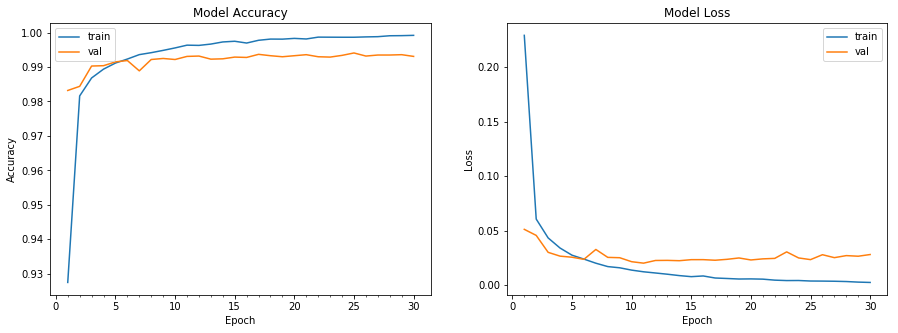

In [22]:
import matplotlib.pyplot as plt
import numpy as np
plot_model_history(model_info)

# 1-Nearest Neighbor

In this section, we are going to train a 1-Nearest Neighbor classifier. As we all know, one huge con of this classifier is that the training process is extremely slow when dataset is big. Each time, we need to go over the dataset and compute the metric distance between the target and every single image in our training set.

I have tried once to train the model on the whole dataset by using ball-tree method (we will experiment more on this method) and it took about 15 minutes to train, which is not appreciable when we want to apply different experiment on this method.

Due to the lack of time and the pursuation to flexibility, starting from this section, we will choose a subset of MNIST to train our model and look at how different parameters affect the performance. For sure this will hurt the performance and the accuracy a lot, which is considered to be one trade-off.

First, since the labels data are given in one-hot, we need to convert them into decimal mode. Then to fit in 1-NN, we may also want to flatten our data from 3-dimension into 1-dimension.

In [8]:
import numpy as np
labels = np.array(range(10)).reshape((10,1))
x_train_flatten = x_train.reshape((x_train.shape[0], -1))
x_test_flatten = x_test.reshape((x_test.shape[0], -1))
y_train_labels = np.dot(y_train, labels).reshape((y_train.shape[0], ))
y_test_labels = np.dot(y_test, labels).reshape((y_test.shape[0], ))

Then we need to select a subset from them. Here, in order to train a more meaningful model, we need to make sure that our dataset is balanced. To force this, I draw equal number of samples from each differen label.

In this section, we are using a subset of 10000 training data and 2000 testing data.

In [23]:
import numpy as np
# choose a balanced subset of raining set
size_train = 6000
size_test = 10000

temp = [0] * 10
x_train_flatten_sub = []
y_train_labels_sub = []
for i in range(len(x_train_flatten)):
    if temp[int(y_train_labels[i])] < (size_train / 10):
        x_train_flatten_sub.append(x_train_flatten[i])
        y_train_labels_sub.append(y_train_labels[i])
        temp[int(y_train_labels[i])] += 1
    if len(x_train_flatten_sub) == size_train:
        break

temp = [0] * 10
x_test_flatten_sub = []
y_test_labels_sub = []
for i in range(len(x_test_flatten)):
    if temp[int(y_test_labels[i])] < (size_test / 10):
        x_test_flatten_sub.append(x_test_flatten[i])
        y_test_labels_sub.append(y_test_labels[i])
        temp[int(y_test_labels[i])] += 1
    if len(x_test_flatten_sub) == size_test:
        break

x_train_flatten_sub, y_train_labels_sub = np.array(x_train_flatten_sub), np.array(y_train_labels_sub)
x_test_flatten_sub, y_test_labels_sub = np.array(x_test_flatten_sub), np.array(y_test_labels_sub)

As we mentioned before, one big con of this classifier is running time grows exponentially as the size of data set grows. For the whole dataset of MNIST, it took about 15 minutes to train the model by using ball-tree.
Here we are going to train the model and test performance and running time on different parameters -- methods, metrics.

In [20]:
# helper functions to draw the confusion matrix
def confusion(testLabels, predictLabels):
    n = NUM_CLASSES
    M = np.zeros((n,n))
    for i in range(len(testLabels)):
        M[int(testLabels[i]), int(predictLabels[i])] += 1
    M /= np.linalg.norm(M, axis=1).reshape((n,1))
    return M

def VisualizeConfussion(M):
    plt.figure(figsize=(14, 6))
    plt.imshow(M)#, vmin=0, vmax=1)
    plt.xticks(np.arange(NUM_CLASSES), np.arange(NUM_CLASSES), rotation='vertical')
    plt.yticks(np.arange(NUM_CLASSES), np.arange(NUM_CLASSES))
    plt.show()

In [24]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

0.9379726139382791


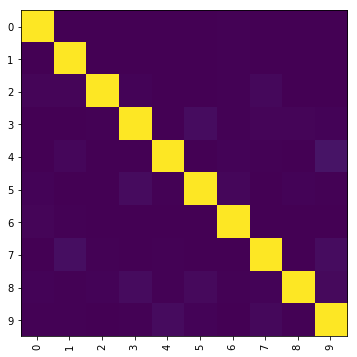

Wall time: 3.46 s


In [25]:
%%time
neigh = KNeighborsClassifier(n_neighbors=1, metric='minkowski', algorithm='brute')
neigh.fit(x_train_flatten_sub, y_train_labels_sub)
print(neigh.score(x_test_flatten_sub, y_test_labels_sub))
predict = neigh.predict(x_test_flatten_sub)
VisualizeConfussion(confusion(y_test_labels_sub, predict))

0.9262211322297159


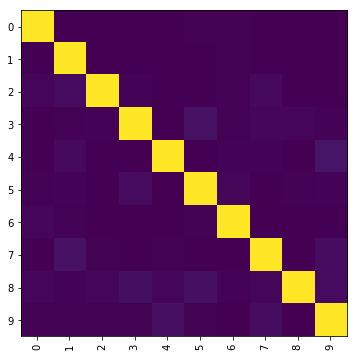

Wall time: 2min 37s


In [26]:
%%time
neigh = KNeighborsClassifier(n_neighbors=1, metric='manhattan', algorithm='ball_tree')
neigh.fit(x_train_flatten_sub, y_train_labels_sub)
print(neigh.score(x_test_flatten_sub, y_test_labels_sub))
predict = neigh.predict(x_test_flatten_sub)
VisualizeConfussion(confusion(y_test_labels_sub, predict))

0.9379726139382791


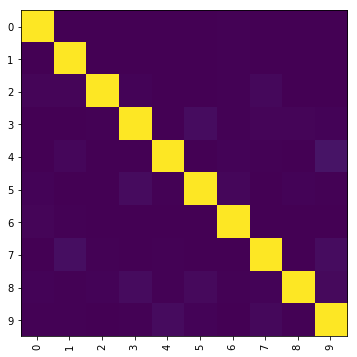

Wall time: 2min 40s


In [27]:
%%time
neigh = KNeighborsClassifier(n_neighbors=1, metric='minkowski', algorithm='ball_tree')
neigh.fit(x_train_flatten_sub, y_train_labels_sub)
print(neigh.score(x_test_flatten_sub, y_test_labels_sub))
predict = neigh.predict(x_test_flatten_sub)
VisualizeConfussion(confusion(y_test_labels_sub, predict))

0.9379726139382791


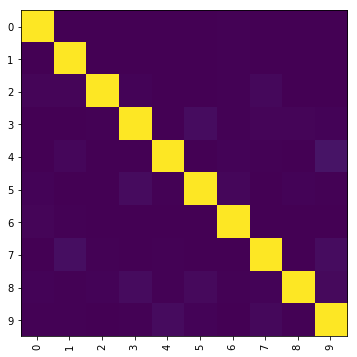

Wall time: 3min 39s


In [28]:
%%time
neigh = KNeighborsClassifier(n_neighbors=1, metric='minkowski', algorithm='kd_tree')
neigh.fit(x_train_flatten_sub, y_train_labels_sub)
print(neigh.score(x_test_flatten_sub, y_test_labels_sub))
predict = neigh.predict(x_test_flatten_sub)
VisualizeConfussion(confusion(y_test_labels_sub, predict))

0.9379726139382791


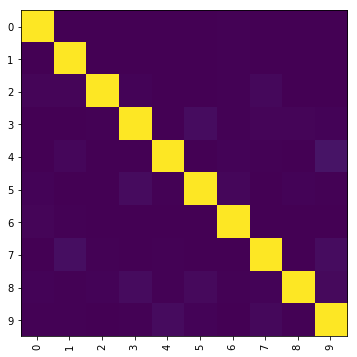

Wall time: 2min 40s


In [29]:
%%time
neigh = KNeighborsClassifier(n_neighbors=1, metric='minkowski', algorithm='ball_tree')
neigh.fit(x_train_flatten_sub, y_train_labels_sub)
print(neigh.score(x_test_flatten_sub, y_test_labels_sub))
predict = neigh.predict(x_test_flatten_sub)
VisualizeConfussion(confusion(y_test_labels_sub, predict))

In this section, I have applied 1-Nearest Neighbor classifier on the MNIST dataset. As mentioned before, one big con of this classifier is running time grows exponentially as the size of data set grows.

For MNIST, it took about 15 minutes to train the model.

One trick to speed up the training process for 1NN or KNN is to use Ball tree or KD tree.

# Support Vector Machine

0.8758


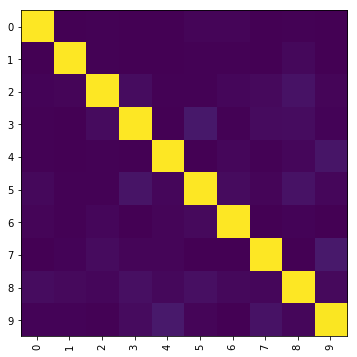

Wall time: 4.7 s


In [30]:
%%time
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(x_train_flatten_sub, y_train_labels_sub)
y_test_predict_svm = clf.predict(x_test_flatten)
print(clf.score(x_test_flatten, y_test_labels))
VisualizeConfussion(confusion(y_test_labels, y_test_predict_svm))

0.9113


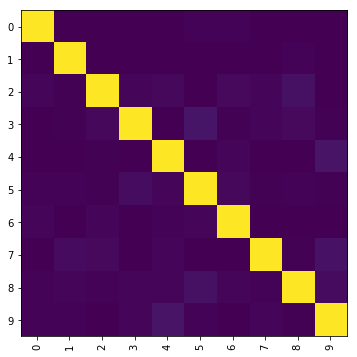

Wall time: 1min 58s


In [31]:
%%time
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train_flatten_sub, y_train_labels_sub)
y_test_predict_svm = clf.predict(x_test_flatten)
print(clf.score(x_test_flatten, y_test_labels))
VisualizeConfussion(confusion(y_test_labels, y_test_predict_svm))

Using the support vector machine, we have acquired a classifier with accuracy 0.9446.
Then by using the linear support vector machine, the accuracy is 0.9181.

# Spatial Pyramid Matching

In [9]:
from spm import build_spatial_pyramid, spatial_pyramid_matching
from utils2 import load_cifar10_data
from utils2 import extract_DenseSift_descriptors
from utils2 import build_codebook
from utils2 import input_vector_encoder
from classifier import svm_classifier

c:\users\heath\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\heath\appdata\local\programs\python\python36\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [10]:
import numpy as np
# choose a balanced subset of raining set
size_train = 6000
size_test = 10000

temp = [0] * 10
x_train_sub = []
y_train_labels_sub = []
for i in range(len(x_train)):
    if temp[int(y_train_labels[i])] < (size_train / 10):
        x_train_sub.append(x_train[i])
        y_train_labels_sub.append(y_train_labels[i])
        temp[int(y_train_labels[i])] += 1
    if len(x_train_sub) == size_train:
        break

temp = [0] * 10
x_test_sub = []
y_test_labels_sub = []
for i in range(len(x_test)):
    if temp[int(y_test_labels[i])] < (size_test / 10):
        x_test_sub.append(x_test[i])
        y_test_labels_sub.append(y_test_labels[i])
        temp[int(y_test_labels[i])] += 1
    if len(x_test_sub) == size_test:
        break

x_train_sub, y_train_labels_sub = np.array(x_train_sub), np.array(y_train_labels_sub)
x_test_sub, y_test_labels_sub = np.array(x_test_sub), np.array(y_test_labels_sub)

In [11]:
x_train_sub.shape

(6000, 28, 28, 1)

In [13]:
import spm
print ("Codebook Size: {:d}".format(spm.VOC_SIZE))
print ("Pyramid level: {:d}".format(spm.PYRAMID_LEVEL))

Codebook Size: 100
Pyramid level: 1


In [14]:
%%time
print ("Dense SIFT feature extraction")
x_train_sub_feature = [extract_DenseSift_descriptors(img) for img in x_train_sub]
x_test_sub_feature = [extract_DenseSift_descriptors(img) for img in x_test_sub]
x_train_kp, x_train_des = zip(*x_train_sub_feature)
x_test_kp, x_test_des = zip(*x_test_sub_feature)

Dense SIFT feature extraction
Wall time: 8.18 s


In [15]:
%%time
import spm
print ("Building the codebook, it will take some time")
codebook = build_codebook(x_train_des, spm.VOC_SIZE)

Building the codebook, it will take some time
Wall time: 15min 37s


In [16]:
%%time
print ("Spatial Pyramid Matching encoding")
x_train_sub = [spm.spatial_pyramid_matching(x_train_sub[i],
                              x_train_des[i],
                              codebook,
                              level=spm.PYRAMID_LEVEL)
                              for i in range(len(x_train_sub))]

x_test_sub = [spm.spatial_pyramid_matching(x_test_sub[i],
                                       x_test_des[i],
                                       codebook,
                                       level=spm.PYRAMID_LEVEL) for i in range(len(x_test_sub))]

Spatial Pyramid Matching encoding
Wall time: 10.1 s


In [17]:
%%time
x_train_sub = np.asarray(x_train_sub)
x_test_sub = np.asarray(x_test_sub)
y_true, y_pred = svm_classifier(x_train_sub, y_train_labels_sub, x_test_sub, y_test_labels_sub)

Tuning hyper-parameters

Best parameters set found on development set:

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Grid scores on development set:

0.632 (+/-0.028) for {'C': 0.001, 'gamma': 0.001}
0.632 (+/-0.028) for {'C': 0.001, 'gamma': 0.01}
0.632 (+/-0.029) for {'C': 0.001, 'gamma': 0.1}
0.632 (+/-0.028) for {'C': 0.001, 'gamma': 1.0}
0.641 (+/-0.027) for {'C': 0.001, 'gamma': 10.0}
0.693 (+/-0.017) for {'C': 0.001, 'gamma': 100.0}
0.632 (+/-0.028) for {'C': 0.01, 'gamma': 0.001}
0.632 (+/-0.028) for {'C': 0.01, 'gamma': 0.01}
0.632 (+/-0.029) for {'C': 0.01, 'gamma': 0.1}
0.632 (+/-0.028) for {'C': 0.01, 'gamma': 1.0}
0.641 (+/-0.029) for {'C': 0.01, 'gamma': 10.0}
0.696 (+/-0.016) for {'C': 0.01, 'gamma': 100.0}
0.632 (+/-0.028) for {'C': 0.1, 'gamma': 0.001}
0.632 (+/-0.028) for {'C': 0.1, 'gamma':

In [18]:
temp = [1 if y_true[i] == y_pred[i] else 0 for i in range(len(y_true))]
print(sum(temp) * 1.0 / len(y_true))

0.8306764765992234


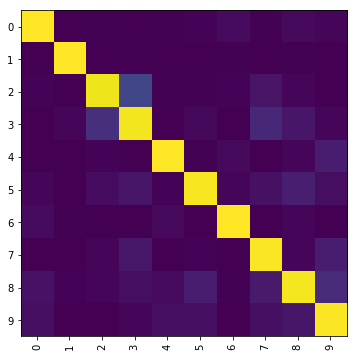

In [21]:
VisualizeConfussion(confusion(y_true, y_pred))